# Numpy and Matplotlib synthesis exercise


Read the data file `Variability_Catalina_list1.csv` which contains lightcurves of an ensemble of objectsobserved in the context of the Catalina survey (http://nesssi.cacr.caltech.edu/DataRelease/). 

This file contains the following columns separated by 'tab' characters: `InputID	ID	Mag	Magerr	RA	Decl	MJD	Blend`. Their meaning is the following: 
* [0] `InputID`: Object Name 
* [1] `ID`: Object ID in the survey
* [2] `Mag`: Object Magnitude ($ m = -2.5 * \log(Flux)$ + zeropoint)
* [3] `Magerr`: Formal error on the magnitude
* [4] `RA`: Right ascension  (degrees)
* [5] `Decl`: Declination  (degrees)
* [6] `MJD`: Modified julian day (day). 
* [7] `Blend`: 0 if the measurement is clean, 1 if there is a possible contamination by another target. 

The file contains the observed magnitude of the following (gravitationally lensed) quasars: 'DESJ0407-5006', 'HE1104-1805', 'HS2209+1914' 'J0011-0845', 'J0228+3953', 'Q1355-2257', 'SDSSJ0904+1512'. 
You want to visualise the lightcurve (x=MJD, y=Mag, yerr=Maggerr) associated to each individual object. You also want to measure its mean magnitude, and the standard deviation on the magnitude, as well as its minimum / maximum magnitude over the period of observation and save those value into a table. Try to reach this goal using only "standard" python commands and commands from numpy and matplotlib arrays. To ease your task, a possible methodology is outlined below.  

**Possible methodology:**
- (1) Read the file and save the output into a numpy array. How many rows and columns does contain the array ? What is the dtype of your array ? 
- (2) Create a sub-array for a single object (e.g. HS2209+1914) using fancy indexing. 
- (3) create an array with 4 columns `MJD, Mag, magerr, blend` , converting strings to floats.
- (4) Get rid of data points with Blend > 0 
- (5) Plot the lightcurve at the screen 
- (6) Calculates mean, std, min, max with numpy 
- (7) Repeat the operation for the 7 object using a for loop.i.e. you can create a list of arrays, each one containing MJD, mag, magerr for each object. In the same loop you can make a plot. You can include the plotting in the loop. To plot into a single figure, think of using plt.subplots(rows=7, figsize=(15,20)). 
- BONUS: How would you proceed to know the names of the individual objects if I did not provide the list ? 

**TIPs:** 

* A file's row mixes strings and floats. You may therefore first create an array of strings (1 single dtype in an array). One of the arguments of `np.loadtxt()` is the data type, so you can read a list of strongs with `np.loadtxt(filename, dtype=str)`
* To convert an array of numbers whose type is strings into float: 
``` python 
myarray_strings = np.array(['1', '2', '3'])  
myarray_floats = np.array(myarray_strings , dtype = float)
```

In [11]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
data_file = 'Variability_Catalina_list1.csv'
data = np.loadtxt(data_file, dtype=str)

In [13]:
data

array([['J0011-0845', '1009002045103', '19.19', ..., '-8.76392',
        '53711.14915', '0'],
       ['J0011-0845', '1009002045103', '19.17', ..., '-8.76410',
        '53711.15716', '0'],
       ['J0011-0845', '1009002045103', '20.03', ..., '-8.76453',
        '53677.20006', '0'],
       ...,
       ['HS2209+1914', '1118114081112', '15.37', ..., '19.48718',
        '56587.16828', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48713',
        '56587.17481', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48708',
        '56587.18086', '0']], dtype='<U14')

In [14]:
data.shape

(2308, 8)

I identify the unique object names in my array. 

In [18]:
objnames = data[:,0]
list_of_objects = list(set(objnames))
list_of_objects

['HS2209+1914',
 'DESJ0407-5006',
 'J0011-0845',
 'J0228+3953',
 'SDSSJ0904+1512',
 'HE1104-1805',
 'Q1355-2257']

I want to create a list of arrays containing MJD, mag, magerr for each object, removing observations with blend > 0.   
For this purpose, let's first see how to select the rows associated to a single object using fancy indexing: 

In [20]:
data_HS2209 = data[data[:,0] == 'HS2209+1914']
data_HS2209

array([['HS2209+1914', '1118114081112', '15.33', ..., '19.48714',
        '53480.47892', '0'],
       ['HS2209+1914', '1118114081112', '15.32', ..., '19.48717',
        '53480.48282', '0'],
       ['HS2209+1914', '1118114081112', '15.31', ..., '19.48713',
        '53480.48672', '0'],
       ...,
       ['HS2209+1914', '1118114081112', '15.37', ..., '19.48718',
        '56587.16828', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48713',
        '56587.17481', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48708',
        '56587.18086', '0']], dtype='<U14')

Now, let's create an array with 4 columns `MJD, Mag, magerr, blend` , converting strings to floats. 

In [36]:
col_of_interest = np.array([6, 2,3, 7])   # MJD=col[6], Mag=col[2], Magerr=col[3], Blend=col[7]
lightcurve_HS2209 = np.array(data_HS2209[:, col_of_interest], dtype=float)

In [37]:
# Alternative command set to convert to floats 
subarray = data_HS2209[:, col_of_interest]
subarray_float = subarray.astype(np.float)

Now, get rid of points where blend > 0

In [38]:
lightcurve_HS2209 = lightcurve_HS2209[lightcurve_HS2209[:,3] < 1]

Now you can plot the lightcurve at the screen

Text(0, 0.5, 'Mag')

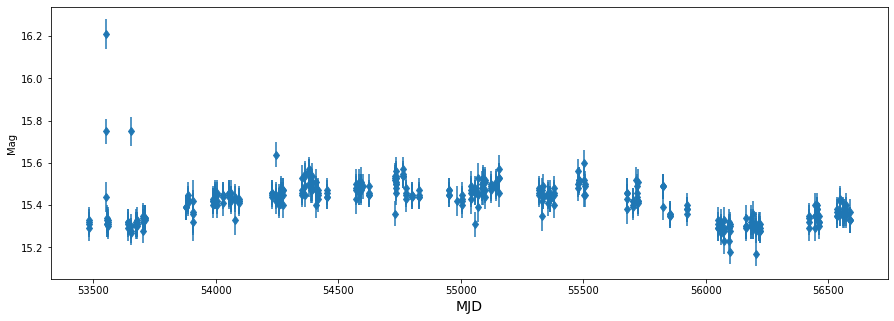

In [40]:
f, ax = plt.subplots(nrows=1, figsize=(15,5))
ax.errorbar(lightcurve_HS2209[:,0], lightcurve_HS2209[:,1], yerr=lightcurve_HS2209[:,2], ls='', marker='d')
ax.set_xlabel('MJD', fontsize=14)
ax.set_ylabel('Mag')

Derive the mean, std, min, max magnitudes

In [42]:
print('Mean = %.2f mag' %lightcurve_HS2209[:,1].mean())
print('Std = %.2f mag' %lightcurve_HS2209[:,1].std())
print('Min = %.2f mag' %lightcurve_HS2209[:,1].min())
print('Max = %.2f mag' %lightcurve_HS2209[:,1].max())

Mean = 15.42 mag
Std = 0.09 mag
Min = 15.17 mag
Max = 16.21 mag


Save those values into an array (for which the first column will be an arbitrary float ID

In [43]:
res = np.zeros(5, dtype=float)
res[1] = lightcurve_HS2209[:,1].mean()
res[2] = lightcurve_HS2209[:,1].std()
res[3] = lightcurve_HS2209[:,1].min()
res[4] = lightcurve_HS2209[:,1].max()

Now, we generalise to all the objects, and create a single figure with all the targets. 

Text(0.5, 0, 'MJD')

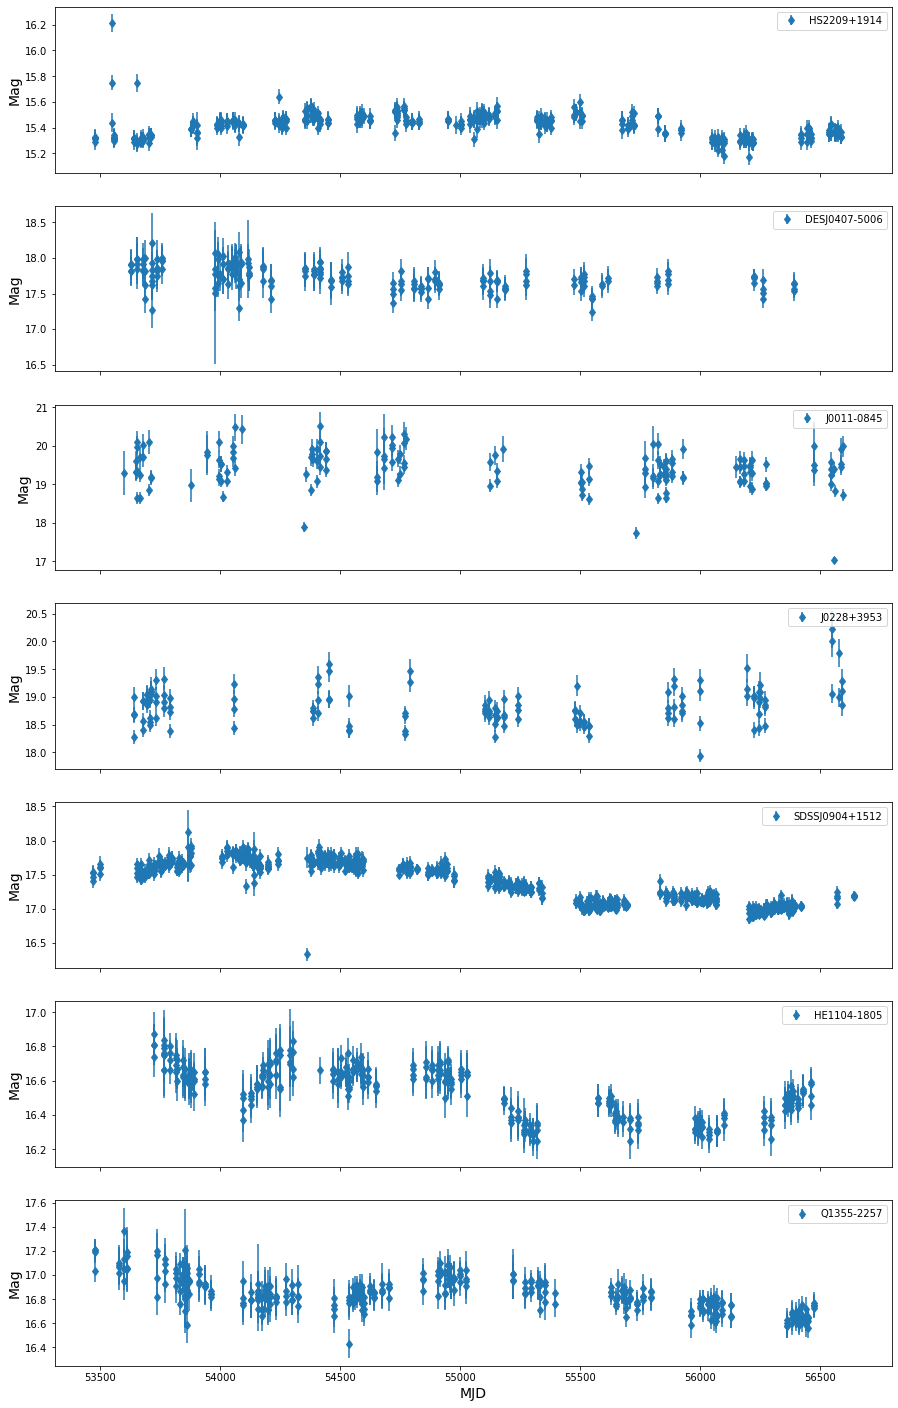

In [50]:
lightcurves = []
f, ax = plt.subplots(nrows=7, figsize=(15,25), sharex=True)
res = np.zeros(shape=(7,5))  # 7 objects, 5 columns: ID, mean, std, min, max
for i, objname in enumerate(list_of_objects):
    data_sub = data[data[:,0]==objname]
    lcv = np.array(data_sub[:, col_of_interest], dtype=float)
    lcv = lcv[lcv[:,3] < 1]
    lightcurves.append(lcv)
    res[i, 0] = i
    res[i, 1] = lcv[:,1].mean()
    res[i, 2] = lcv[:,1].std()
    res[i, 3] = lcv[:,1].min()
    res[i, 4] = lcv[:,1].max()
    ax[i].errorbar(lcv[:,0], lcv[:,1], yerr=lcv[:,2], ls='', marker='d', label=objname)
    ax[i].set_ylabel('Mag', fontsize=14)
    ax[i].legend()
ax[6].set_xlabel('MJD', fontsize=14)

The table with the results of interest

In [51]:
res

array([[ 0.        , 15.4187062 ,  0.09287819, 15.17      , 16.21      ],
       [ 1.        , 17.73141414,  0.1630115 , 17.24      , 18.21      ],
       [ 2.        , 19.41538462,  0.48859477, 17.04      , 20.52      ],
       [ 3.        , 18.8423913 ,  0.33894456, 17.94      , 20.22      ],
       [ 4.        , 17.38941476,  0.29853487, 16.33      , 18.13      ],
       [ 5.        , 16.54213376,  0.14620758, 16.25      , 16.87      ],
       [ 6.        , 16.85125   ,  0.13809504, 16.43      , 17.37      ]])